In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans 

In [28]:
data = pd.read_csv(r"E:\Data Science Material udemy\data of coding\3.01.+Country+clusters.csv")

In [29]:
data 

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data 

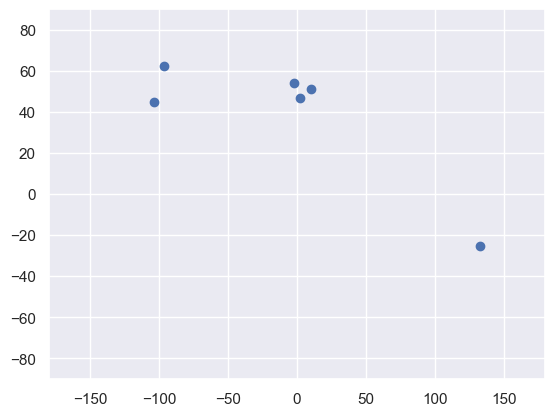

In [30]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Select the features 

In [31]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering 

In [32]:
Kmeans = KMeans(3)

In [33]:
Kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering results

In [34]:
identified_clusters = Kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [35]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


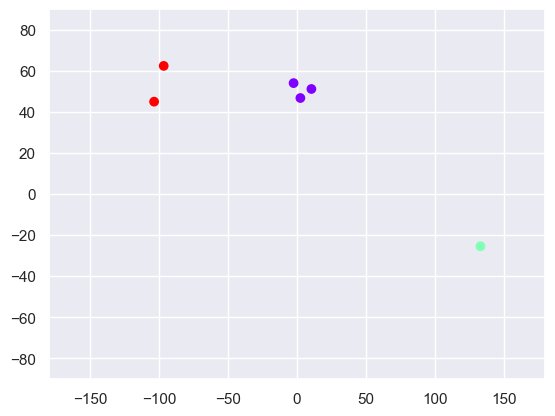

In [36]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [37]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the Features 

In [38]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


### Clustering 

In [39]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering results 

In [40]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 0, 2, 0])

In [41]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,0


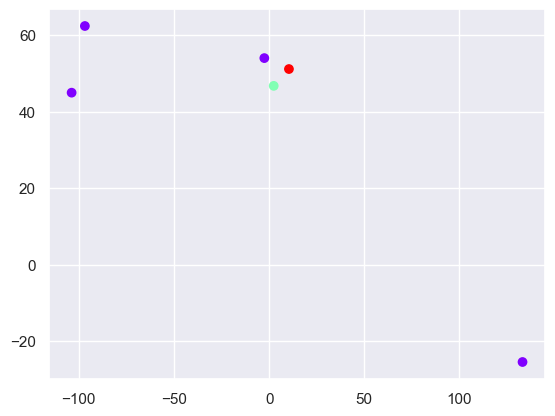

In [42]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'],cmap='rainbow')

## Selecting the number of clusters 

### WCSS 

In [43]:
Kmeans.inertia_

288.10523333333333

In [44]:
wcss=[]

for i in range(1,7):
    Kmeans = KMeans(i)
    Kmeans.fit(x)
    wcss_iter = Kmeans.inertia_
    wcss.append(wcss_iter)

AttributeError: 'NoneType' object has no attribute 'split'

In [45]:
wcss 

[]

In [ ]:
number_clusters= range(1,7)
plt.plot